# California Housing

## SetUp

In [2]:
!python -m pip --version

pip 24.0 from C:\Users\hyanl\miniconda3\Lib\site-packages\pip (python 3.12)



In [3]:
!python -m pip install -U pip

In [4]:
!python -m pip install -U matplotlib numpy pandas scipy scikit-learn

In [5]:
!pip list

Package                   Version
------------------------- --------
anyio                     4.2.0
archspec                  0.2.3
argon2-cffi               21.3.0
argon2-cffi-bindings      21.2.0
asttokens                 2.4.1
async-lru                 2.0.4
attrs                     23.1.0
Babel                     2.11.0
beautifulsoup4            4.12.2
bleach                    4.1.0
boltons                   23.0.0
Brotli                    1.0.9
certifi                   2024.2.2
cffi                      1.16.0
charset-normalizer        2.0.4
colorama                  0.4.6
comm                      0.2.1
conda                     24.3.0
conda-content-trust       0.2.0
conda-libmamba-solver     23.12.0
conda-package-handling    2.2.0
conda_package_streaming   0.9.0
contourpy                 1.2.1
cryptography              41.0.7
cycler                    0.12.1
debugpy                   1.8.0
decorator                 5.1.1
defusedxml                0.7.1
distro              

## Get the Data

### Download the Data

In [6]:
import os
from utils.download_extract_data import fetch_housing_data

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("../data")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"
    
fetch_housing_data(HOUSING_URL, HOUSING_PATH, 'housing.tgz')

In [7]:
import pandas as pd

housing = pd.read_csv(HOUSING_PATH + "/housing.csv")
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


### Take a Quick Look at the Data Structure

In [8]:
 housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [9]:
housing['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [10]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

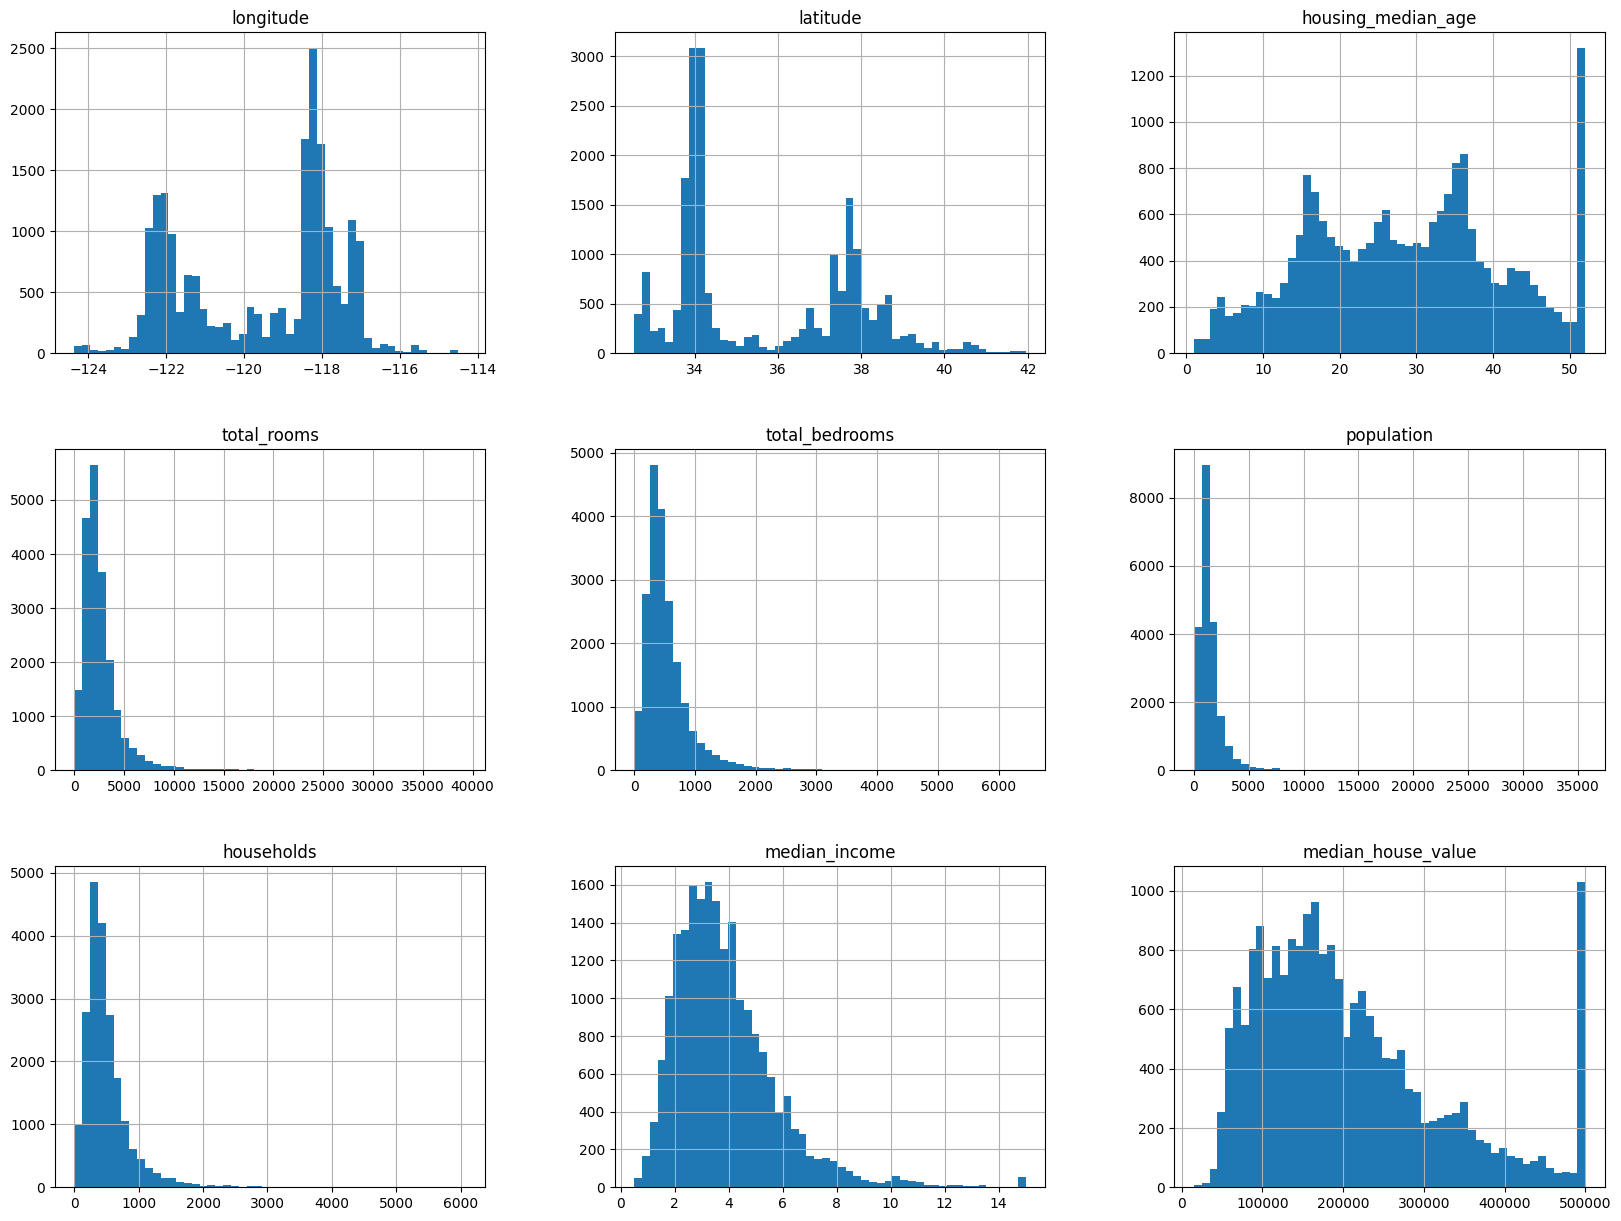

In [11]:
housing.hist(bins=50, figsize=(20,15))

### Create a Test Set

In [12]:
import numpy as np
from sklearn.model_selection import train_test_split

np.random.seed(42)
train_set, test_set = train_test_split(housing, test_size=0.2)

<Axes: >

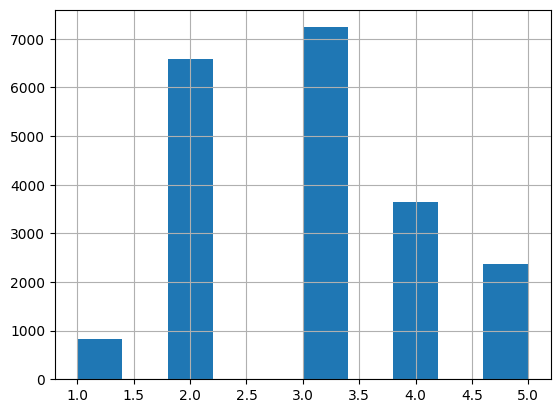

In [13]:
housing['income_cat'] = pd.cut(housing['median_income'],
                               bins=[0, 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])
housing['income_cat'].hist()

In [14]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2)
for train_index, test_index in split.split(housing, housing.income_cat):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [15]:
(strat_test_set['income_cat'].value_counts() / len(strat_test_set)) * 100

income_cat
3    35.053295
2    31.879845
4    17.635659
5    11.434109
1     3.997093
Name: count, dtype: float64

In [16]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop('income_cat', axis=1, inplace=True)

## Discover and Visualize the Data to Gain Insights

In [17]:
housing = strat_train_set.copy() 

<Axes: xlabel='longitude', ylabel='latitude'>

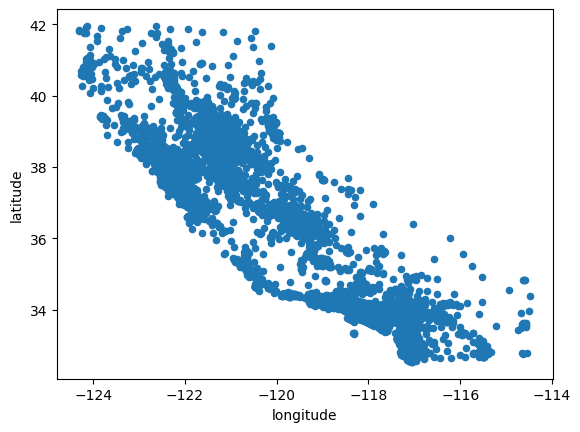

In [18]:
housing.plot(kind='scatter', x='longitude', y='latitude',)

<Axes: xlabel='longitude', ylabel='latitude'>

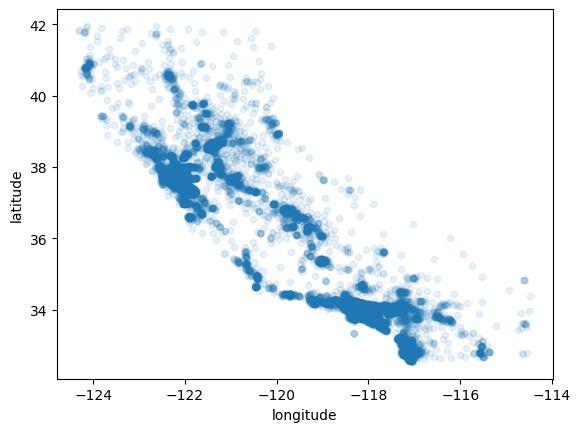

In [19]:
housing.plot(kind='scatter', x='longitude', y='latitude', alpha=0.1)

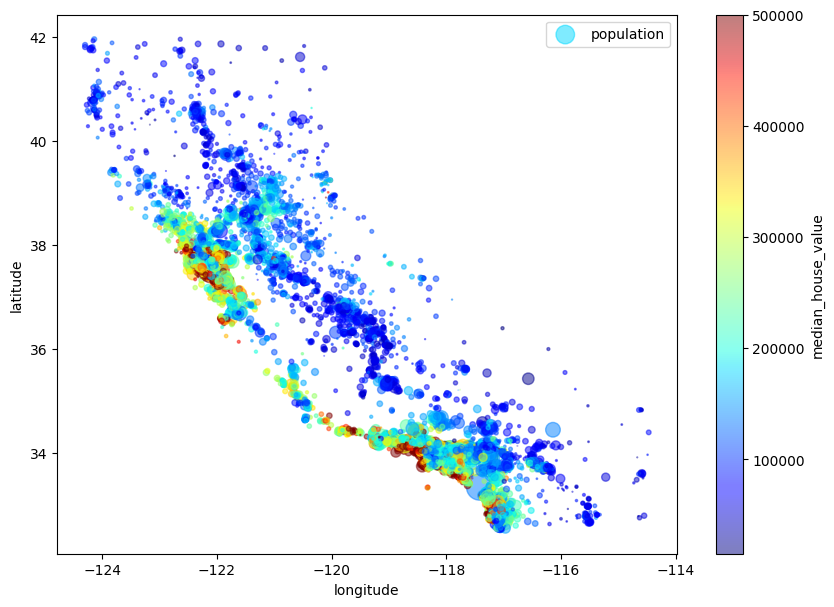

In [20]:
import matplotlib.pyplot as plt

housing.plot(kind='scatter', x='longitude', y='latitude', alpha=0.5,
             s=housing['population']/100, label='population', figsize=(10, 7),
             c='median_house_value', cmap=plt.get_cmap('jet'), colorbar=True,)

plt.legend()

Saving figure california_housing_prices_plot


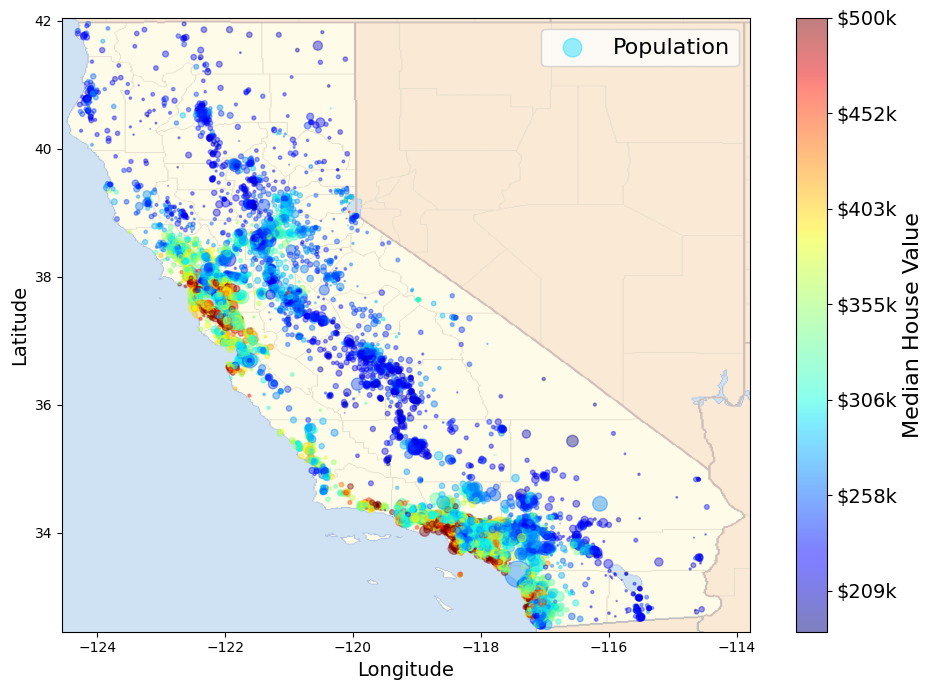

In [21]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from utils.save_image import save_fig
from utils.download_img import download_image

IMAGES_PATH = os.path.join("../images")
os.makedirs(IMAGES_PATH, exist_ok=True)
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
filename = "california.png"
download_url = DOWNLOAD_ROOT + "images/end_to_end_project/" + filename

download_image(download_url, os.path.join(IMAGES_PATH, filename))

california_img = mpimg.imread(os.path.join(IMAGES_PATH, filename))

ax = housing.plot(kind="scatter", x="longitude", y="latitude", figsize=(10, 7),
                  s=housing['population'] / 100, label="Population",
                  c="median_house_value", cmap=plt.get_cmap("jet"),
                  colorbar=False, alpha=0.4)

plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5,
           cmap=plt.get_cmap("jet"))

plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)

prices = housing["median_house_value"]
tick_values = np.linspace(prices.min(), prices.max(), 11)
cbar = plt.colorbar(ticks=tick_values / prices.max())
cbar.ax.set_yticklabels(["$%dk" % (round(v / 1000)) for v in tick_values], fontsize=14)
cbar.set_label('Median House Value', fontsize=16)

plt.legend(fontsize=16)

save_fig("california_housing_prices_plot", IMAGES_PATH)

plt.show()

### Looking for Correlations

In [22]:
corr_matrix = housing.corr(numeric_only=True)

In [23]:
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687503
total_rooms           0.134840
housing_median_age    0.100240
households            0.066133
total_bedrooms        0.048870
population           -0.023160
longitude            -0.045047
latitude             -0.144090
Name: median_house_value, dtype: float64

array([[<Axes: xlabel='median_house_value', ylabel='median_house_value'>,
        <Axes: xlabel='median_income', ylabel='median_house_value'>,
        <Axes: xlabel='total_rooms', ylabel='median_house_value'>,
        <Axes: xlabel='housing_median_age', ylabel='median_house_value'>],
       [<Axes: xlabel='median_house_value', ylabel='median_income'>,
        <Axes: xlabel='median_income', ylabel='median_income'>,
        <Axes: xlabel='total_rooms', ylabel='median_income'>,
        <Axes: xlabel='housing_median_age', ylabel='median_income'>],
       [<Axes: xlabel='median_house_value', ylabel='total_rooms'>,
        <Axes: xlabel='median_income', ylabel='total_rooms'>,
        <Axes: xlabel='total_rooms', ylabel='total_rooms'>,
        <Axes: xlabel='housing_median_age', ylabel='total_rooms'>],
       [<Axes: xlabel='median_house_value', ylabel='housing_median_age'>,
        <Axes: xlabel='median_income', ylabel='housing_median_age'>,
        <Axes: xlabel='total_rooms', ylabel='housi

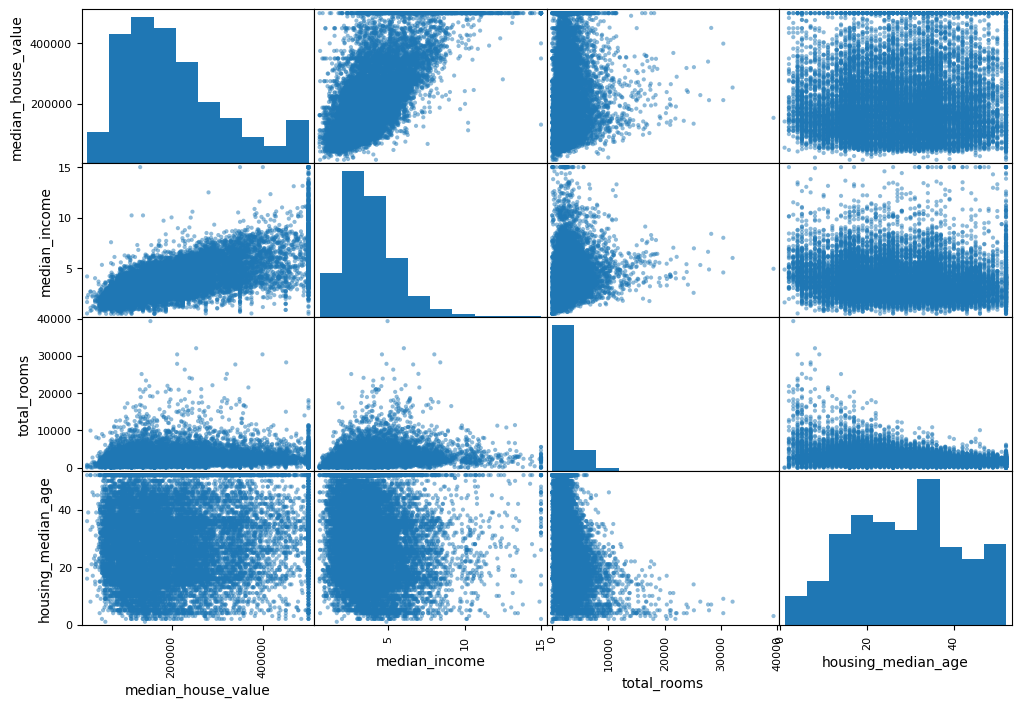

In [24]:
from pandas.plotting import scatter_matrix

attributes = ['median_house_value', 'median_income', 'total_rooms', 'housing_median_age']

scatter_matrix(housing[attributes], figsize=(12, 8))

<Axes: xlabel='median_income', ylabel='median_house_value'>

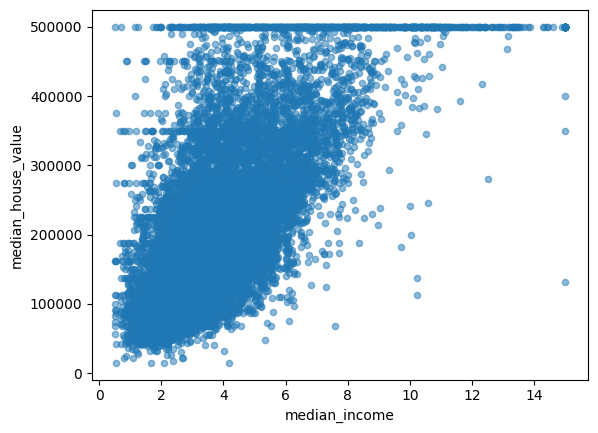

In [25]:
housing.plot(kind='scatter', x='median_income', y='median_house_value', alpha=0.5)

### Experimenting with Attribute Combinations

In [26]:
housing['rooms_per_household'] = housing['total_rooms'] / housing['households']
housing['bedrooms_per_room'] = housing['total_bedrooms'] / housing['total_rooms']
housing['population_per_household'] = housing['population'] / housing['households']

In [27]:
corr_matrix = housing.corr(numeric_only=True)
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687503
rooms_per_household         0.146196
total_rooms                 0.134840
housing_median_age          0.100240
households                  0.066133
total_bedrooms              0.048870
population_per_household   -0.021685
population                 -0.023160
longitude                  -0.045047
latitude                   -0.144090
bedrooms_per_room          -0.255194
Name: median_house_value, dtype: float64

In [28]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household
count,16512.000000,16512.000000,16512.000000,16512.000000,16339.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16339.000000,16512.000000
mean,-119.560922,35.622091,28.726078,2635.290031,537.518575,1424.506298,499.468568,3.867738,206645.734012,5.423693,0.213143,3.098845
std,2.001311,2.130767,12.572970,2176.517157,421.001365,1124.761718,381.635790,1.890184,115103.718837,2.565474,0.058323,11.587236
min,-124.300000,32.540000,1.000000,2.000000,1.000000,5.000000,1.000000,0.499900,14999.000000,0.846154,0.100000,0.692308
25%,-121.790000,33.930000,18.000000,1446.000000,295.000000,790.000000,280.000000,2.563850,119400.000000,4.442904,0.175615,2.430456
50%,-118.480000,34.250000,29.000000,2130.000000,435.000000,1167.000000,409.000000,3.539200,179800.000000,5.221658,0.203180,2.820830
75%,-118.000000,37.710000,37.000000,3146.000000,647.000000,1727.000000,603.250000,4.745325,263925.000000,6.046067,0.239654,3.279945
max,-114.470000,41.950000,52.000000,39320.000000,6210.000000,35682.000000,5358.000000,15.000100,500001.000000,141.909091,1.000000,1243.333333


## Prepare the Data for Machine Learning Algorithms

In [29]:
housing = strat_train_set.drop('median_house_value', axis=1)
housing_labels = strat_train_set['median_house_value'].copy()

### Data Cleaning

In [30]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy = 'median')

In [31]:
housing_num = housing.drop('ocean_proximity', axis=1)

In [32]:
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [33]:
imputer.statistics_

array([-118.48  ,   34.25  ,   29.    , 2130.    ,  435.    , 1167.    ,
        409.    ,    3.5392])

In [34]:
housing_num.median().values

array([-118.48  ,   34.25  ,   29.    , 2130.    ,  435.    , 1167.    ,
        409.    ,    3.5392])

In [35]:
X = imputer.transform(housing_num)

In [36]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns,
                          index=housing_num.index)

In [37]:
housing_tr.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16512 entries, 7146 to 15459
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16512 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
dtypes: float64(8)
memory usage: 1.1 MB


### Handling Text and Categorical Attributes

In [38]:
housing_cat = housing[['ocean_proximity']]
housing_cat.head(10)

,ocean_proximity
7146,<1H OCEAN
7819,<1H OCEAN
4239,<1H OCEAN
2956,INLAND
17553,<1H OCEAN
10220,<1H OCEAN
4319,<1H OCEAN
623,NEAR BAY
3638,<1H OCEAN
2382,INLAND


In [39]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]

array([[0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [3.],
       [0.],
       [1.]])

In [40]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [42]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [44]:
housing_cat_1hot.toarray()

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

In [45]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

### Custom Transformers

In [47]:
from sklearn.base import BaseEstimator, TransformerMixin

rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

In [49]:
    attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
    housing_extra_attribs = attr_adder.transform(housing.values)

In [50]:
col_names = 'total_rooms', 'total_bedrooms', 'population', 'households'
rooms_ix, bedrooms_ix, population_ix, households_ix = [
    housing.columns.get_loc(c) for c in col_names]

In [51]:
housing_extra_attribs = pd.DataFrame(
    housing_extra_attribs,
    columns=list(housing.columns)+['rooms_per_household', 'population_per_household'],
    index=housing.index)
housing_extra_attribs.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,population_per_household
7146,-118.14,34.02,45.0,1307.0,283.0,967.0,254.0,2.75,<1H OCEAN,5.145669,3.807087
7819,-118.11,33.9,36.0,1347.0,278.0,748.0,278.0,5.1423,<1H OCEAN,4.845324,2.690647
4239,-118.32,34.11,42.0,2462.0,543.0,857.0,482.0,4.0833,<1H OCEAN,5.107884,1.778008
2956,-119.02,35.34,38.0,1463.0,294.0,692.0,295.0,2.3125,INLAND,4.959322,2.345763
17553,-121.88,37.33,41.0,395.0,164.0,549.0,184.0,2.375,<1H OCEAN,2.146739,2.983696


### Transformation Pipelines

In [52]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler()),
])

housing_num_tr = num_pipeline.fit_transform(housing_num)

In [53]:
housing_num_tr

array([[ 0.71001743, -0.75190707,  1.29439696, ..., -0.10837475,
         0.06112445,  0.03877141],
       [ 0.72500806, -0.80822651,  0.57855399, ..., -0.22545045,
        -0.03522924, -0.11387339],
       [ 0.62007364, -0.70966749,  1.05578264, ..., -0.12310365,
        -0.11399408,  0.09936674],
       ...,
       [ 0.6950268 , -0.75190707,  0.81716832, ..., -0.80505556,
         0.06975429,  1.0432911 ],
       [-1.42864594,  1.01746206, -1.80758925, ..., -1.19456741,
        -0.06839687,  3.54155048],
       [ 1.14474573, -1.16022302, -1.96666546, ...,  0.24109322,
        -0.03027039, -0.61778874]])

In [54]:
from sklearn.compose import ColumnTransformer

num_attribs = list(housing_num)
cat_attribs = ['ocean_proximity']

full_pipeline = ColumnTransformer([
    ('num', num_pipeline, num_attribs),
    ('cat', OneHotEncoder(), cat_attribs),
])

housing_prepared = full_pipeline.fit_transform(housing)

In [55]:
housing_prepared

array([[ 0.71001743, -0.75190707,  1.29439696, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.72500806, -0.80822651,  0.57855399, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.62007364, -0.70966749,  1.05578264, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.6950268 , -0.75190707,  0.81716832, ...,  0.        ,
         0.        ,  0.        ],
       [-1.42864594,  1.01746206, -1.80758925, ...,  0.        ,
         1.        ,  0.        ],
       [ 1.14474573, -1.16022302, -1.96666546, ...,  0.        ,
         0.        ,  1.        ]])

## Select and Train a Model

### Training and Evaluating on the Training Set

In [56]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression()

In [57]:
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)
print('Predictions:', lin_reg.predict(some_data_prepared))

Predictions: [180747.59595603 276966.27772602 267406.96838601 121202.74500104
 205762.37915715]


In [58]:
print('Labels:', list(some_labels))

Labels: [178300.0, 183100.0, 434400.0, 65800.0, 175000.0]


In [59]:
from sklearn.metrics import mean_squared_error

housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

np.float64(68275.33256391036)

In [62]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor()

In [64]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

np.float64(0.0)

### Better Evaluation Using Cross-Validation

In [65]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
                         scoring='neg_mean_squared_error', cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [66]:
def display_scores(scores):
    print('Scores:', scores)
    print('Mean:', scores.mean())
    print('Standard deviation:', scores.std())

In [67]:
display_scores(tree_rmse_scores)

Scores: [72139.92435452 70206.90170332 70515.6382614  69385.9775179
 71543.40251914 74810.53135346 67186.66222833 68413.13621895
 66207.34955143 72145.56576816]
Mean: 70255.50894766138
Standard deviation: 2440.41189076996


In [68]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels,
                             scoring='neg_mean_squared_error', cv=10)

lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [71163.36387006 68476.66423534 65757.48962104 72528.41386517
 70280.8525583  69706.34883251 67543.83791516 66362.57773938
 66281.11841655 68151.21615879]
Mean: 68625.18832123106
Standard deviation: 2141.0612040372157


In [69]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(housing_prepared, housing_labels)

RandomForestRegressor(random_state=42)

In [70]:
housing_predictions = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

np.float64(18526.45933479298)

In [72]:
forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [50885.92292485 51920.90995546 47089.3524357  49552.5602591
 50466.33426049 51711.52820582 48614.2660206  47763.42105607
 49246.76665831 51037.72240697]
Mean: 49828.878418336506
Standard deviation: 1567.4045052509402


In [73]:
!pip install joblib

In [74]:
from joblib import dump

dump(lin_reg, '../models/lin_reg.joblib')
dump(tree_reg, '../models/tree_reg.joblib')
dump(forest_reg, '../models/forest_reg.joblib')

['../models/forest_reg.joblib']

## Fine-Tune Your Model

### Grid Search

In [76]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
]

forest_reg = RandomForestRegressor()

grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)

grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [77]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [78]:
grid_search.best_estimator_

RandomForestRegressor(max_features=8, n_estimators=30)

In [79]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres['mean_test_score'], cvres['params']):
    print(np.sqrt(-mean_score), params)

64327.958383000594 {'max_features': 2, 'n_estimators': 3}
55359.07775742289 {'max_features': 2, 'n_estimators': 10}
52054.201998821314 {'max_features': 2, 'n_estimators': 30}
60380.327822659885 {'max_features': 4, 'n_estimators': 3}
52466.77361168876 {'max_features': 4, 'n_estimators': 10}
49829.75454150928 {'max_features': 4, 'n_estimators': 30}
58323.606545578805 {'max_features': 6, 'n_estimators': 3}
51991.27021561377 {'max_features': 6, 'n_estimators': 10}
49672.783999529194 {'max_features': 6, 'n_estimators': 30}
57836.77387521627 {'max_features': 8, 'n_estimators': 3}
51924.769206815974 {'max_features': 8, 'n_estimators': 10}
49656.81878740305 {'max_features': 8, 'n_estimators': 30}
61502.79793580021 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
53550.11836735653 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
60141.689395329944 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
51920.14332324471 {'bootstrap': False, 'max_features': 3, 'n_estimato

### Randomized Search

In [80]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=8),
    }

forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
rnd_search.fit(housing_prepared, housing_labels)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   param_distributions={'max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000017DA97282F0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000017DACF49CA0>},
                   random_state=42, scoring='neg_mean_squared_error')

In [81]:
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

48793.10821769346 {'max_features': 7, 'n_estimators': 180}
51305.28370182704 {'max_features': 5, 'n_estimators': 15}
50111.27913544556 {'max_features': 3, 'n_estimators': 72}
50479.98661192682 {'max_features': 5, 'n_estimators': 21}
49031.78981673838 {'max_features': 7, 'n_estimators': 122}
50098.37117579639 {'max_features': 3, 'n_estimators': 75}
49931.58374816203 {'max_features': 3, 'n_estimators': 88}
49119.148158560296 {'max_features': 5, 'n_estimators': 100}
49745.66940212757 {'max_features': 3, 'n_estimators': 150}
65436.2712668671 {'max_features': 5, 'n_estimators': 2}


### Analyze the Best Models and Their Errors

In [82]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([6.15784348e-02, 6.07898377e-02, 4.20418673e-02, 1.54490350e-02,
       1.53334386e-02, 1.50503831e-02, 1.45722292e-02, 4.11396132e-01,
       3.43648827e-02, 1.14012712e-01, 5.09956071e-02, 4.44003790e-03,
       1.54465299e-01, 2.44278516e-04, 1.76389559e-03, 3.50192980e-03])

In [83]:
extra_attribs = ['rooms_per_hhold', 'pop_per_hhold', 'bedrooms_per_room']
cat_encoder = full_pipeline.named_transformers_['cat']
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(np.float64(0.4113961319457348), 'median_income'),
 (np.float64(0.15446529925610056), 'INLAND'),
 (np.float64(0.11401271159735825), 'pop_per_hhold'),
 (np.float64(0.06157843483414306), 'longitude'),
 (np.float64(0.060789837668953885), 'latitude'),
 (np.float64(0.05099560705215314), 'bedrooms_per_room'),
 (np.float64(0.042041867287187736), 'housing_median_age'),
 (np.float64(0.0343648826762166), 'rooms_per_hhold'),
 (np.float64(0.015449034978810311), 'total_rooms'),
 (np.float64(0.015333438632832909), 'total_bedrooms'),
 (np.float64(0.01505038308970164), 'population'),
 (np.float64(0.014572229165488353), 'households'),
 (np.float64(0.0044400379030286015), '<1H OCEAN'),
 (np.float64(0.0035019298017628323), 'NEAR OCEAN'),
 (np.float64(0.0017638955949595162), 'NEAR BAY'),
 (np.float64(0.00024427851556778487), 'ISLAND')]

### Evaluate Your System on the Test Set